# Clean GSS Variables used in Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

In [4]:
# Read in the GSS variables.
path = 'gss.hdf5'
gss = pd.read_hdf(path, key='gss')
gss.head()

,ballot,fund,other,denom,relig,cappun,libhomo,colhomo,spkhomo,natfare,...,nateduc,natdrug,natcity,natheal,natenvir,natspac,polviews,partyid,size,year
0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,72,1972
1,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,72,1972
2,NaN,2.0,NaN,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,72,1972
3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,72,1972
4,NaN,2.0,NaN,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,72,1972


In [21]:
def make_plots(percentages, index):
    for column in percentages.columns[1:index]:
        plt.plot(percentages['year'], percentages[column], label=" ".join(column.split()[:-1]))
        
    plt.legend()
    plt.title("Always Wrong")
    plt.xlabel("Year")
    plt.ylabel("Percent")
    plt.show()
    
    for column in percentages.columns[index:]:
        plt.plot(percentages['year'], percentages[column], label=" ".join(column.split()[:-1]))
        
    plt.legend()
    plt.title("Never Wrong")
    plt.xlabel("Year")
    plt.ylabel("Percent")
    plt.show()

## Cohort-Period Analysis

### Sex

In [17]:
grouped_year = gss.groupby('year')

columns = ['year', 'male always', 'female always', 'male never', 'female never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_sex = group.groupby('sex')
    male_homosex = grouped_sex.get_group(1)['homosex'].dropna()
    female_homosex = grouped_sex.get_group(2)['homosex'].dropna()
    
    percent_male_always = (male_homosex == 1).mean() * 100
    percent_male_never = (male_homosex == 4).mean() * 100
    percent_female_always = (female_homosex == 1).mean() * 100
    percent_female_never = (female_homosex == 4).mean() * 100
    
    row = pd.DataFrame([[year, percent_male_always, percent_female_always, percent_male_never, percent_female_never]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

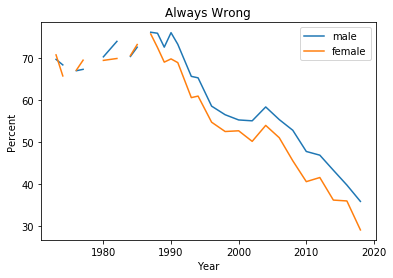

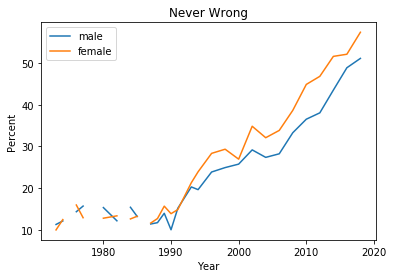

In [22]:
make_plots(percentages, 3)

Is there a dip in the 1980s?

### Income

In [24]:
grouped_year = gss.groupby('year')

columns = ['year',
           '<10 always',
           '10-30 always',
           '30-50 always',
           '50-70 always',
           '70-90 always',
           '>90 always',
           '<10 never',
           '10-30 never',
           '30-50 never',
           '50-70 never',
           '70-90 never',
           '>90 never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    inc1 = group[(group['realrinc'] < 10000)]
    percent_inc1_always = (inc1['homosex'].dropna() == 1).mean()
    percent_inc1_never = (inc1['homosex'].dropna() == 4).mean()
    
    inc2 = group[(group['realrinc'] >= 10000) & (group['realrinc'] < 30000)]
    percent_inc2_always = (inc2['homosex'].dropna() == 1).mean()
    percent_inc2_never = (inc2['homosex'].dropna() == 4).mean()
    
    inc3 = group[(group['realrinc'] >= 30000) & (group['realrinc'] < 50000)]
    percent_inc3_always = (inc3['homosex'].dropna() == 1).mean()
    percent_inc3_never = (inc3['homosex'].dropna() == 4).mean()
    
    inc4 = group[(group['realrinc'] >= 50000) & (group['realrinc'] < 70000)]
    percent_inc4_always = (inc4['homosex'].dropna() == 1).mean()
    percent_inc4_never = (inc4['homosex'].dropna() == 4).mean()
    
    inc5 = group[(group['realrinc'] >= 70000) & (group['realrinc'] < 90000)]
    percent_inc5_always = (inc5['homosex'].dropna() == 1).mean()
    percent_inc5_never = (inc5['homosex'].dropna() == 4).mean()
    
    inc6 = group[(group['realrinc'] >= 90000)]
    percent_inc6_always = (inc6['homosex'].dropna() == 1).mean()
    percent_inc6_never = (inc6['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year,
                         percent_inc1_always,
                         percent_inc2_always,
                         percent_inc3_always,
                         percent_inc4_always,
                         percent_inc5_always,
                         percent_inc6_always,
                         percent_inc1_never,
                         percent_inc2_never,
                         percent_inc3_never,
                         percent_inc4_never,
                         percent_inc5_never,
                         percent_inc6_never]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

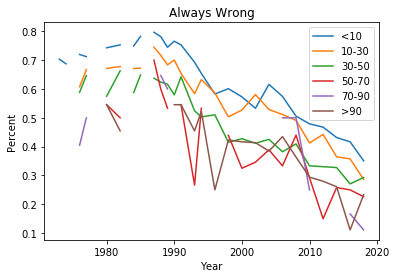

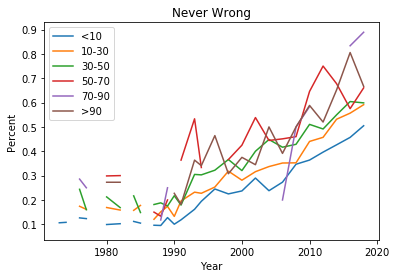

In [25]:
make_plots(percentages, 7)

### Political Affiliation

In [27]:
grouped_year = gss.groupby('year')

columns = ['year',
          'ext lib always',
          'lib always',
          'sl lib always',
          'mod always',
          'sl con always',
          'con always',
          'ext con always',
          'ext lib never',
          'lib never',
          'sl lib never',
          'mod never',
          'sl con never',
          'con never',
          'ext con never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_pol = group.groupby('polviews')
    keys = list(grouped_pol.groups.keys())
    if len(keys) == 7:
        ela = (grouped_pol.get_group(1)['homosex'].dropna() == 1).mean()
        la = (grouped_pol.get_group(2)['homosex'].dropna() == 1).mean()
        sla = (grouped_pol.get_group(3)['homosex'].dropna() == 1).mean()
        ma = (grouped_pol.get_group(4)['homosex'].dropna() == 1).mean()
        sca = (grouped_pol.get_group(5)['homosex'].dropna() == 1).mean()
        ca = (grouped_pol.get_group(6)['homosex'].dropna() == 1).mean()
        eca = (grouped_pol.get_group(7)['homosex'].dropna() == 1).mean()
        
        eln = (grouped_pol.get_group(1)['homosex'].dropna() == 4).mean()
        ln = (grouped_pol.get_group(2)['homosex'].dropna() == 4).mean()
        sln = (grouped_pol.get_group(3)['homosex'].dropna() == 4).mean()
        mn = (grouped_pol.get_group(4)['homosex'].dropna() == 4).mean()
        scn = (grouped_pol.get_group(5)['homosex'].dropna() == 4).mean()
        cn = (grouped_pol.get_group(6)['homosex'].dropna() == 4).mean()
        ecn = (grouped_pol.get_group(7)['homosex'].dropna() == 4).mean()
        row = pd.DataFrame([[year, ela, la, sla, ma, sca, ca, eca, eln, ln, sln, mn, scn, cn, ecn]], columns=columns)

        percentages = percentages.append(row, ignore_index=True)

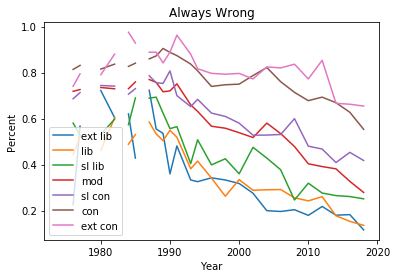

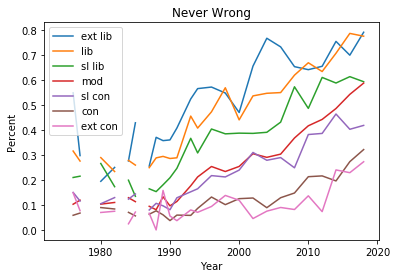

In [28]:
make_plots(percentages, 8)

### Religion

In [29]:
grouped_year = gss.groupby('year')
rel = gss.groupby('relig')

# Only the first 5 categories have consistent numbers of respondants.
columns = ['year',
          'protestant always',
          'catholic always',
          'jewish always',
          'none always',
          'other always',
          'protestant never',
          'catholic never',
          'jewish never',
          'none never',
          'other never'
          ]

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_relig = group.groupby('relig')
    keys = list(grouped_relig.groups.keys())
    
    pa = (grouped_relig.get_group(1)['homosex'].dropna() == 1).mean()
    ca = (grouped_relig.get_group(2)['homosex'].dropna() == 1).mean()
    ja = (grouped_relig.get_group(3)['homosex'].dropna() == 1).mean()
    na = (grouped_relig.get_group(4)['homosex'].dropna() == 1).mean()
    oa = (grouped_relig.get_group(5)['homosex'].dropna() == 1).mean()
    
    pn = (grouped_relig.get_group(1)['homosex'].dropna() == 4).mean()
    cn = (grouped_relig.get_group(2)['homosex'].dropna() == 4).mean()
    jn = (grouped_relig.get_group(3)['homosex'].dropna() == 4).mean()
    nn = (grouped_relig.get_group(4)['homosex'].dropna() == 4).mean()
    on = (grouped_relig.get_group(5)['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year, pa, ca, ja, na, oa, pn, cn, jn, nn, on]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

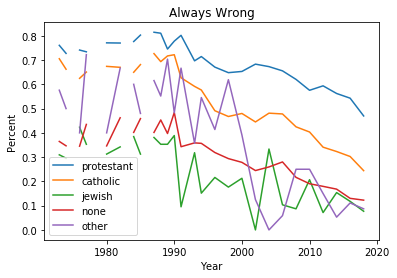

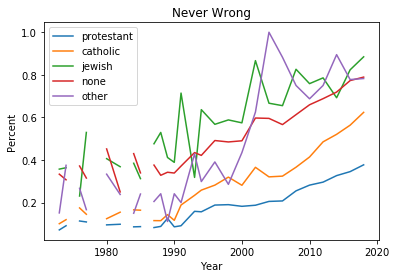

In [30]:
make_plots(percentages, 6)

### Fundamentalism

In [31]:
grouped_year = gss.groupby('year')

columns = ['year',
          'fundamentalist always',
          'moderate always',
          'liberal always',
          'fundamentalist never',
          'moderate never',
          'liberal never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_fund = group.groupby('fund')
    
    fa = (grouped_fund.get_group(1)['homosex'].dropna() == 1).mean()
    ma = (grouped_fund.get_group(2)['homosex'].dropna() == 1).mean()
    la = (grouped_fund.get_group(3)['homosex'].dropna() == 1).mean()
    
    fn = (grouped_fund.get_group(1)['homosex'].dropna() == 4).mean()
    mn = (grouped_fund.get_group(2)['homosex'].dropna() == 4).mean()
    ln = (grouped_fund.get_group(3)['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year, fa, ma, la, fn, mn, ln]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

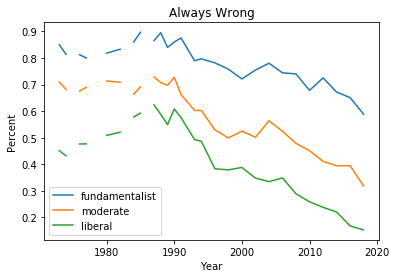

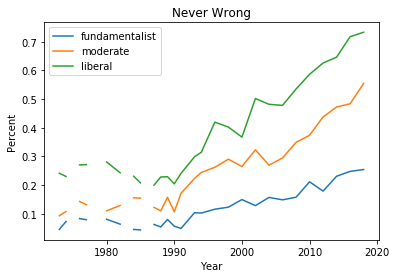

In [32]:
make_plots(percentages, 4)